In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

In [10]:
gray_img = cv2.imread('Photos/Uppsala Sunset.jpg')  # if use parameter 0 => define grayscale color space
gray_img = cv2.resize(gray_img, (960, 720), interpolation=cv2.INTER_AREA)
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('Photos/Gray Image.png', gray_img)
# cv2.imshow('Image', img)
#
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Image Negative
w, h = gray_img.shape
L = gray_img.max()

img_neg = L - gray_img
cv2.imwrite('Photos/Image Negative.png', img_neg)

# Threshold Function
m = 150
img_thresh = np.zeros((w, h), dtype=int)

for i in range(w):
    for j in range(h):
        if gray_img[i, j] < m:
            img_thresh[i, j] = 0
        else:
            img_thresh[i, j] = 255

cv2.imwrite('Photos/Threshold_img.png', img_thresh)


True

In [3]:
# Log Transformation
c = 255 / (np.log(1 + L))
log_transformed = c * np.log(1 + gray_img)

log_transformed = np.array(log_transformed, dtype=np.uint8)

cv2.imwrite('Photos/Log Transformation.png', log_transformed)

# print(log_transformed)

/tmp/ipykernel_8838/3921634225.py:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)


True

In [4]:
# Gamma Transformation
for gamma in [0.1, 0.5, 1.2, 2.2]:
    gamma_corrected = np.array(255 * (gray_img / 255) ** gamma, dtype='uint8')

    cv2.imwrite('Photos/gamma_corrected_' + str(gamma) + '.jpg', gamma_corrected)

In [5]:
# Piece-wise Linear Transformation
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2


r1 = 70
s1 = 0
r2 = 140
s2 = 255

pixelVal_vec = np.vectorize(pixelVal)

contrast_stretched = pixelVal_vec(gray_img, r1, s1, r2, s2)

cv2.imwrite('Photos/constrast_stretching.jpg', contrast_stretched)

True

In [22]:
def myfunc(a, b):
    if a > b:
        return a - b
    else:
        return a + b


vfunc = np.vectorize(myfunc)
rs = vfunc([1, 2, 3, 4, 5, 6, 7, 8], 4)
print(rs)

[5 6 7 8 1 2 3 4]


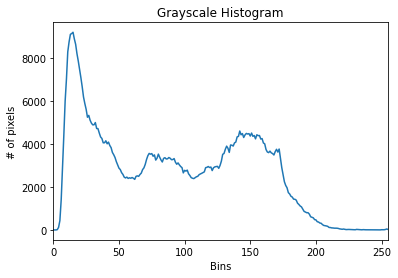

In [18]:
gray_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0, 255])
plt.show()

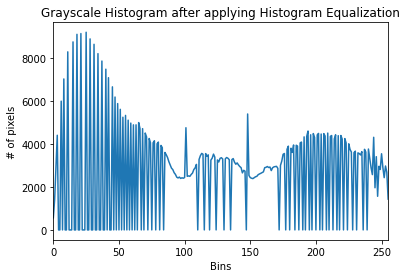

In [19]:
# Histogram Equalization
equalized = cv2.equalizeHist(gray_img)
cv2.imwrite('Photos/Histogram Equalization.png', equalized)

gray_hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure()
plt.title('Grayscale Histogram after applying Histogram Equalization')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0, 255])
plt.show()

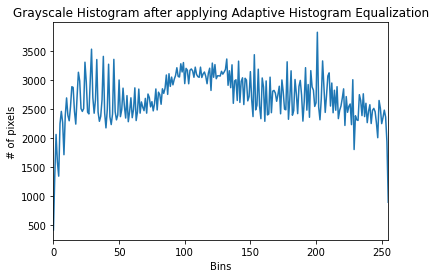

In [36]:
# Adaptive Histogram Equalization (CLAHE)
# 2 parameters:
# - clipLimit: the threshold for contrast limiting (should be from 2-5)
# - tileGridSize: divides the input image into MxN tiles and then apply histogram equalization to each local tile

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(3, 3))
clahe_equalized = clahe.apply(gray_img)

cv2.imwrite('Photos/AHE.png', clahe_equalized)

gray_hist = cv2.calcHist([clahe_equalized], [0], None, [256], [0, 256])

plt.figure()
plt.title('Grayscale Histogram after applying Adaptive Histogram Equalization')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0, 255])
plt.show()

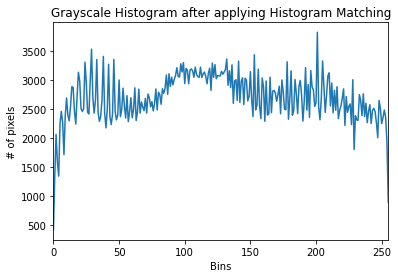

In [51]:
# Histogram Matching
### NOTE:
# - Histogram matching can be applied to both single-channel and multi-channel by setting 'multi' parameter

src = cv2.imread('Photos/vuinberlin.jpg')
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ref = cv2.imread('Photos/AHE.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# print(src.shape[-1])

# => count number of channels in the image
# This case we apply Histogram Matching to multi-channel image

# multi = True if src.shape[-1] > 1 else False
# matched = exposure.match_histograms(src, ref, multichannel=multi)

matched = exposure.match_histograms(src, ref, multichannel=False)

cv2.imwrite('Photos/Histogram Matching.png', matched)

gray_hist = cv2.calcHist([clahe_equalized], [0], None, [256], [0, 256])

plt.figure()
plt.title('Grayscale Histogram after applying Histogram Matching')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0, 255])
plt.show()

In [52]:
cv2.waitKey(0)
cv2.destroyAllWindows()